# Задание

3. Провести кластеризацию (все методы)
4. Для каждого метода подобрать оптимальные гипер-параметры.
5. Самостоятельно реализовать KMeans. Проверить его работу на датасетах.
6. Каждый метод оценивать 2 внешними и 2 внутренними метриками.

# Доп. задание:

Реализовать DB-Scan

In [1]:
from pathlib import Path
import os
import sys

sys.path.append(str(Path(os.getcwd()).parent))

In [184]:
import matplotlib.pyplot as plt
import numpy as np

In [188]:
# Внешние метрики
from sklearn.metrics.cluster import rand_score
from sklearn.metrics.cluster import adjusted_rand_score

# Внутренние метрики
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [189]:
def draw(X: np.ndarray, y: np.ndarray) -> None:
    plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")
    plt.show()

In [230]:
def internal_metrics(X: np.ndarray, y_pred: np.ndarray) -> None:
    print(f"""
Внутренние метрики:
    1. Silhouette score = {silhouette_score(X, y_pred)};
    2. Davies-Bouldin score = {davies_bouldin_score(X, y_pred)};
    """)

def external_metrics(y_true: np.ndarray, y_pred: np.ndarray) -> None:
    print(f"""
Внешние метрики:
    1. Rand score = {rand_score(y_true, y_pred)};
    2. Adjusted rand score = {adjusted_rand_score(y_true, y_pred)};
    """)

In [199]:
def GridSearchClusters(estimator, X, min_c: int, max_c: int, verbose=True, **kwargs) -> tuple:
    best_silhouette = 0
    best_est = None
    best_c = None
    ss = []
    for i in range(min_c, max_c):
        est = estimator(i, **kwargs).fit(X)
        silhouette = silhouette_score(X, est.labels_)
        ss.append(silhouette)
        if silhouette >= best_silhouette:
            best_est = est
            best_silhouette = silhouette
            best_c = i

    if verbose:
        plt.plot(range(min_c, max_c), ss)

    return best_est, best_c

# 1. Генерация датасетов

In [3]:
from sklearn.datasets import make_classification

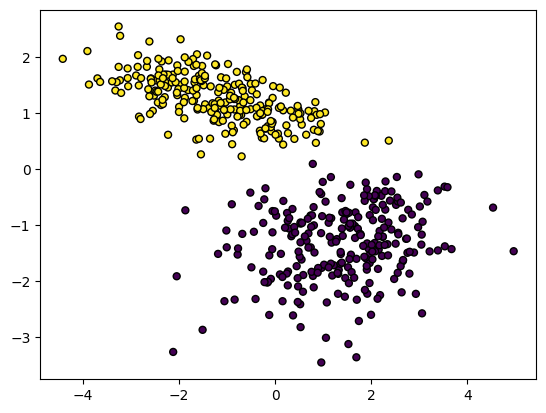

In [182]:
X1, y1 = make_classification(500, n_classes=2, n_features=2, n_redundant=0, n_clusters_per_class=1, flip_y=0, class_sep=1.3)
draw(X1, y1)

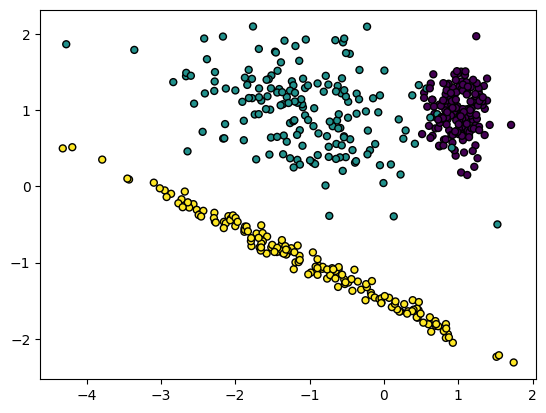

In [99]:
X2, y2 = make_classification(500, n_classes=3, n_features=2, n_redundant=0, n_clusters_per_class=1, flip_y=0)
draw(X2, y2)

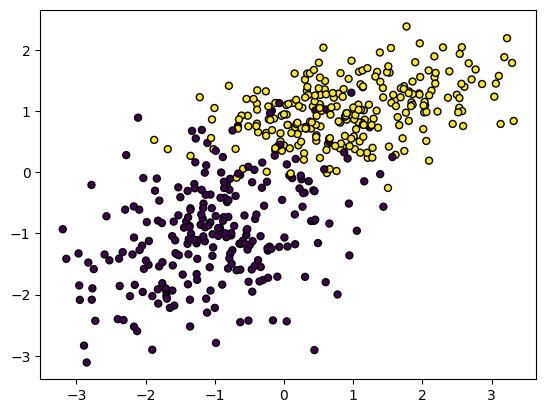

In [173]:
X3, y3 = make_classification(500, n_classes=2, n_features=2, n_redundant=0, n_clusters_per_class=1, flip_y=0)
draw(X3, y3)

# 2. Кластеризация

In [191]:
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from sklearn_som.som import SOM

## 2.1 KMeans

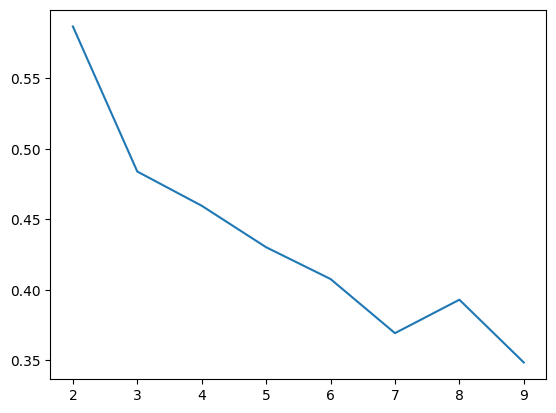

In [231]:
kmeans, c= GridSearchClusters(KMeans, X1, 2, 10, n_init='auto')

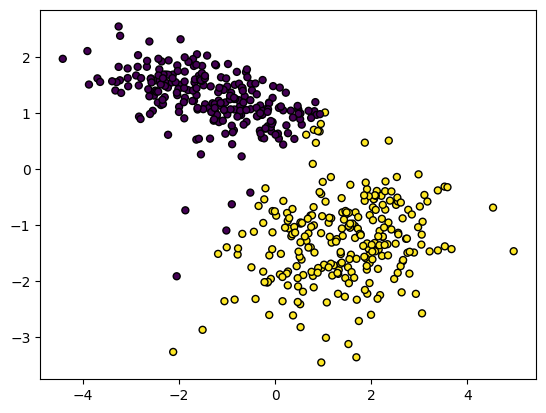

In [232]:
draw(X1, kmeans.labels_)

In [234]:
internal_metrics(X1, kmeans.labels_)
external_metrics(y1, kmeans.labels_)


Внутренние метрики:
    1. Silhouette score = 0.5866565069421117;
    2. Davies-Bouldin score = 0.590742087415198;
    

Внешние метрики:
    1. Rand score = 0.9454589178356714;
    2. Adjusted rand score = 0.8909174536649234;
    


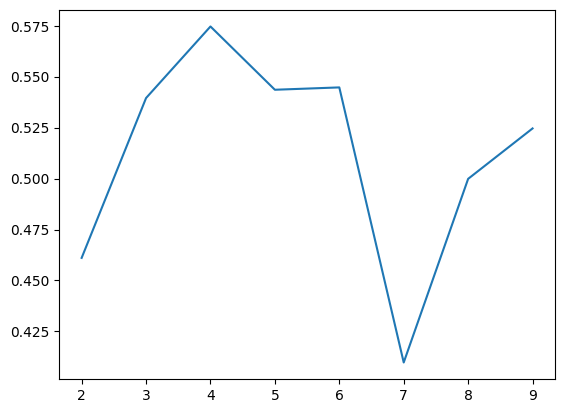

In [235]:
kmeans, c = GridSearchClusters(KMeans, X2, 2, 10, n_init='auto')

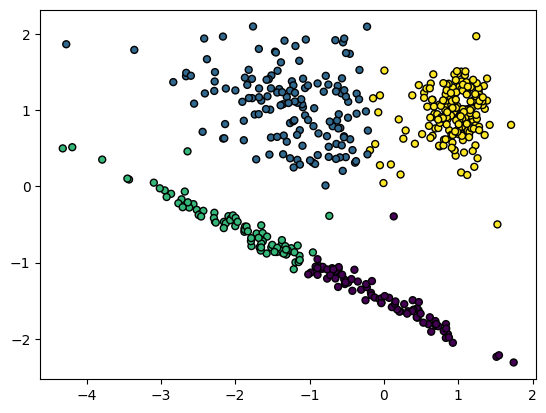

In [236]:
draw(X2, kmeans.labels_)

In [238]:
internal_metrics(X2, kmeans.labels_)
external_metrics(y2, kmeans.labels_)


Внутренние метрики:
    1. Silhouette score = 0.5746198736316833;
    2. Davies-Bouldin score = 0.6668262362109394;
    

Внешние метрики:
    1. Rand score = 0.8866533066132265;
    2. Adjusted rand score = 0.7337473267403096;
    


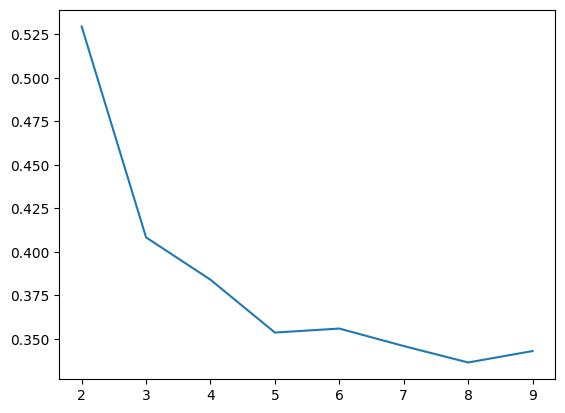

In [239]:
kmeans, c = GridSearchClusters(KMeans, X3, 2, 10, n_init='auto')

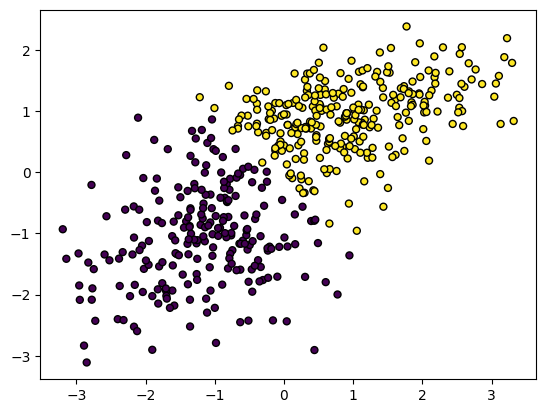

In [240]:
draw(X3, kmeans.labels_)

In [241]:
internal_metrics(X3, kmeans.labels_)
external_metrics(y3, kmeans.labels_)


Внутренние метрики:
    1. Silhouette score = 0.5294013420354359;
    2. Davies-Bouldin score = 0.6723993058056572;
    

Внешние метрики:
    1. Rand score = 0.8325931863727455;
    2. Adjusted rand score = 0.6651922997592085;
    


## 2.2 AffinityPropagation